# Finding Indicators of Heavy Traffic on the I-94

This project will examine the traffic on the I-94 Interstate highway in the US. The highway connects the Great Lakes and northern Great Plains regions. The data was collected at a station located approximately halfway between Saint Paul and Minneapolis, and only recorded westbound traffic.

The data set used was collected by John Hogue and made available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).
The data set contains information for the period 2012-2018 and the following columns:

- `holiday` Categorical US National holidays plus regional holiday
- `temp` Numerical average temperature in kelvin
- `rain_1h` Numerical amount in mm of rain that occurred in the hour
- `snow_1h` Numerical amount in mm of snow that occurred in the hour
- `clouds_all` Numerical percentage of cloud cover
- `weather_main` Categorical short textual description of the current weather
- `weather_description` Categorical longer textual description of the current weather
- `date_time` DateTime hour of the data collected in local CST time
- `traffic_volume` Numerical hourly I-94 ATR 301 reported westbound traffic volume

The goal of the analysis is to look for indicators of heavy traffic on the Interstate. The indicators could be time-of-day, weather, week day, etc. Due to the data being collected solely at one station, we can only apply our findings with certainty to that area of the highway, and may not be able to generalize the findings to the Interstate as a whole. The station also recorded westbound traffic only.

# 1.0 Examining the data

In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
from IPython.display import display;

%matplotlib inline

traffic = pd.read_csv("metro_interstate_traffic_volume.csv")

In [2]:
display(traffic.head())
display(traffic.info())

holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


None

## 1.1 Examining the `traffic_volume` column

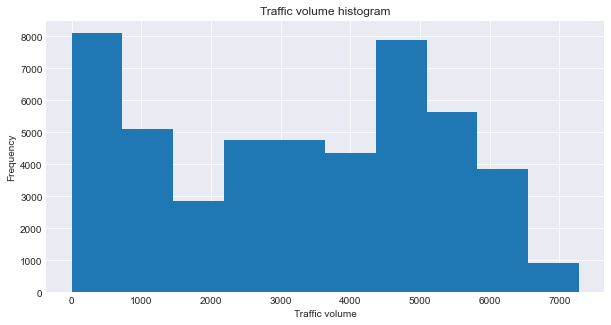

In [3]:
#plotting a histogram of `traffic_volume`
plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(10,5))
traffic["traffic_volume"].plot(kind="hist")
plt.title('Traffic volume histogram')
plt.xlabel("Traffic volume")

plt.show()

In [4]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From the information above we can see that the `traffic_volume` column contains no null values and that the mean value is approximately 3259.
There is a high frequency of low traffic volume (0-1000) and a notable spike in frequency around traffic volume of 5000. These two spikes likely correspond to nighttime and daytime, respectively.

## 1.2 Exploring the correlation between `traffic_volume` and `date_time` columns

First, we will convert the `date_time` column to the datetime format.
Next, we will divide the data set into two parts:
- Daytime data: the hours from 07:00. to 18:00 (inclusive).
- Nighttime data: the hours from 19:00 to 06:00 (inclusive).

In [5]:
#converting the `date_time` column to datetime type
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic['date_time']

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

In [6]:
#dividing the data set into daytime and nighttime
traffic_day = traffic[traffic['date_time'].dt.hour.between(7,18)].copy()
traffic_night = traffic[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour <= 6)].copy()

print(traffic_day['date_time'].dt.hour.value_counts().sort_index(), '\n')
print(traffic_night['date_time'].dt.hour.value_counts().sort_index())

7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
Name: date_time, dtype: int64 

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
19    1961
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64


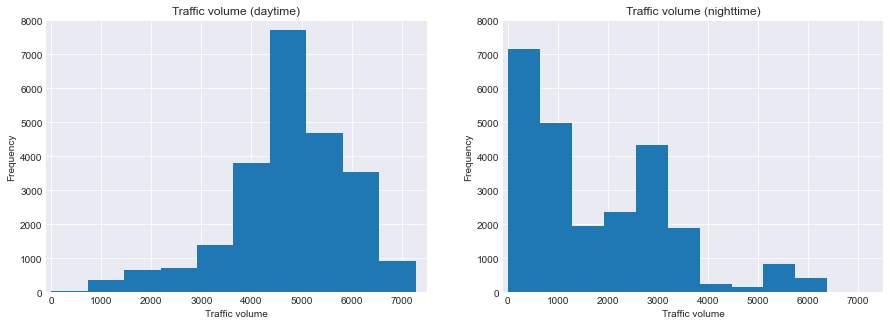

In [7]:
#plotting `traffic_volume` for daytime and nighttime
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
traffic_day["traffic_volume"].plot(kind="hist")
plt.title('Traffic volume (daytime)')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.xlim(-100,7500)
plt.ylim(0,8000)

plt.subplot(1,2,2);
traffic_night["traffic_volume"].plot(kind="hist")
plt.title('Traffic volume (nighttime)')
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.subplots_adjust(wspace=0.2)
plt.xlim(-100,7500)
plt.ylim(0,8000)

plt.show()

In [8]:
print(traffic_day['traffic_volume'].describe(), '\n')
print(traffic_night['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64 

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


From the histograms we can see that the day traffic is left skewed and has a significantly higher volume than the night traffic. The traffic has a strong peak at a volume of about 4500-5000. The night traffic is right skewed and has a peak between approximately 0-1200, as well as a smaller peak at around 3000.

These observations from the histograms match well with the statistics for the `traffic_volume` column for both day and night traffic.
The goal is to find indicators of heavy traffic, for this reason the daytime data is most helpful and we will focus on that first. The nighttime data will be handled in a separate section.

## 1.3 Exploring daytime traffic data

### 1.3.1 Exploring the effect of date and time on traffic volume

We will check if the date and time has any predictable effect on the traffic. We will examine months, days, and hours to look for patterns.

In [9]:
#grouping daytime data by month 
traffic_day.loc[:, 'month'] = traffic_day.loc[:,'date_time'].dt.month
group_month_day = traffic_day.groupby('month').mean()
group_month_day['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

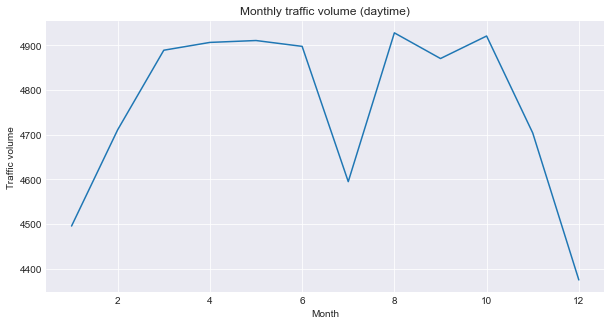

In [10]:
#creating line plot
plt.figure(figsize=(10,5))
group_month_day['traffic_volume'].plot()
plt.title('Monthly traffic volume (daytime)')
plt.xlabel('Month')
plt.ylabel('Traffic volume')

plt.show()

There is a notable dip in traffic volume during July. This likely corresponds to the summer holidays; indicating that people are on vacation.
Another dip in traffic happens in December-January. This might be related to the Christmas holidays or the fact that the weather tends to be worse during the winter months.

In [11]:
#grouping daytime data by day of week
traffic_day.loc[:, 'weekday'] = traffic_day.loc[:, 'date_time'].dt.dayofweek
group_day_daytime = traffic_day.groupby('weekday').mean()
group_day_daytime['traffic_volume'] #0 is Monday and 6 is Sunday

weekday
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

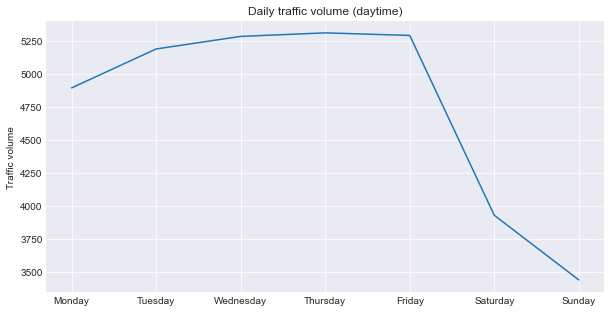

In [12]:
#creating line plot
plt.figure(figsize=(10,5))
group_day_daytime['traffic_volume'].plot()
plt.title('Daily traffic volume (daytime)')
plt.xlabel('')
plt.ylabel('Traffic volume')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

As expected, the traffic is consistent across all the weekdays and then drops of dramatically during the weekend.

In [13]:
#grouping by time of day
traffic_day.loc[:, 'hour'] = traffic_day.loc[:, 'date_time'].dt.hour
workday_day_daytime = traffic_day[traffic_day['weekday'].between(0,4)].copy()
weekend_day_daytime = traffic_day[traffic_day['weekday'] >= 5].copy()

group_hour_workday_day = workday_day_daytime.groupby('hour').mean()
group_hour_weekend_day = weekend_day_daytime.groupby('hour').mean()

print("Hourly traffic (workdays):")
print(group_hour_workday_day['traffic_volume'], '\n')
print("Hourly traffic (weekend):")
print(group_hour_weekend_day['traffic_volume'], '\n')

Hourly traffic (workdays):
hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64 

Hourly traffic (weekend):
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64 



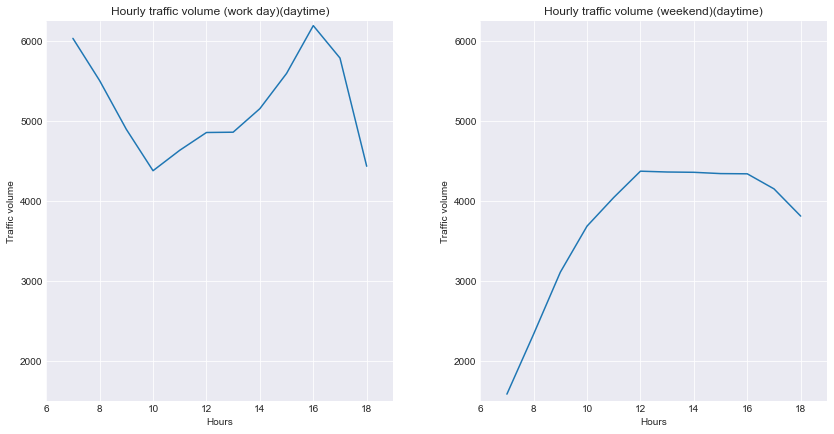

In [14]:
#creating line plot
plt.figure(figsize=(14,7))
plt.subplots_adjust(wspace=0.25)

plt.subplot(1,2,1)
group_hour_workday_day['traffic_volume'].plot()
plt.title('Hourly traffic volume (work day)(daytime)')
plt.xlabel('Hours')
plt.ylabel('Traffic volume')
plt.xlim(6,19)
plt.ylim(1500, 6250)

plt.subplot(1,2,2)
group_hour_weekend_day['traffic_volume'].plot()
plt.title('Hourly traffic volume (weekend)(daytime)')
plt.xlabel('Hours')
plt.ylabel('Traffic volume')
plt.xlim(6,19)
plt.ylim(1500, 6250)

plt.show()

From the 'Workday' plot on the left it can clearly be seen that the rush hour traffic is around 07:00 and 16:00 as expected given typical work hours.  
On the weekends the busiest hours are between 11:00 and 16:00. The weekend traffic is much lower than the work day traffic even during peak hours.

### 1.3.2 Exploring the effect of weather on traffic volume

Next, we will explore the effect of weather indicators on the traffic volume for daytime traffic. Bad weather would likely mean that traffic moves slower, but also that fewer people would take to the roads.

The columns of interest are:

- `temp` Numerical average temperature in kelvin
- `rain_1h` Numerical amount in mm of rain that occurred in the hour
- `snow_1h` Numerical amount in mm of snow that occurred in the hour
- `clouds_all` Numerical percentage of cloud cover
- `weather_main` Categorical short textual description of the current weather
- `weather_description` Categorical longer textual description of the current weather

All but the last two of these columns are numerical so we will start by looking up their correlation values with the `traffic_volume` column.

In [15]:
traffic_day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
weekday          -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The weather indicator that has the strongest correlation with traffic volume is temperature. We will plot a scatter plot to visualize the correlation.

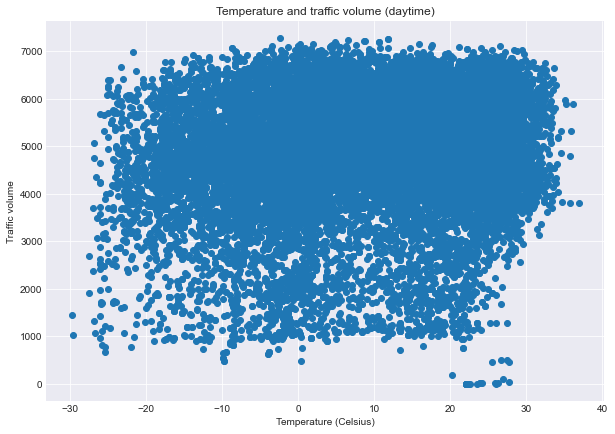

In [16]:
#removing a few outlier '0' values from the `temp` column
traffic_day = traffic_day[traffic_day['temp'] > 0]

#converting from Kelvin to Celsius using the formula: T(°C) = T(K) - 273.15
traffic_day['temp'] = traffic_day['temp'] - 273.15

#scatter plot
plt.figure(figsize=(10,7))
plt.scatter(x=traffic_day['temp'], y=traffic_day['traffic_volume'])
plt.title('Temperature and traffic volume (daytime)')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Traffic volume')

plt.show()

As expected from the correlation calculations there seems to be only a very weak connection between temperature and traffic volume.

Since the numerical weather columns are not reliable indicators of heavy traffic, we will instead look at the two categorical weather columns: `weather_main` and `weather_description`.

In [17]:
#grouping by the categorical columns
group_weather_main_day = traffic_day.groupby('weather_main').mean()
group_weather_desc_day = traffic_day.groupby('weather_description').mean()

display(group_weather_main_day)
display(group_weather_desc_day)

temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                              
Clear         10.760932  0.000000  0.000000    1.670846     4779.622257   
Clouds         9.779274  0.000000  0.000000   62.667548     4865.415996   
Drizzle       11.306433  0.170804  0.000000   84.704417     4837.212911   
Fog            4.429641  0.163840  0.001409   65.477901     4372.491713   
Haze           2.169353  0.040036  0.000000   64.000000     4609.893285   
Mist           6.270825  0.249992  0.000825   74.961435     4623.976475   
Rain          13.939601  3.972943  0.000292   75.870116     4815.568462   
Smoke         19.255833  0.878333  0.000000   53.333333     4564.583333   
Snow          -5.165495  0.014017  0.001768   80.501376     4396.321183   
Squall        23.580000  1.020000  0.000000   75.000000     4211.000000   
Thunderstorm  20.214678  1.146475  0.000000   75.184035     4648.212860   

                 month   weekday       hour  
weather_main                                 
Clear         6.492163  3.137931  12.405956  
Clouds        6.393243  3.005631  12.911974  
Drizzle       7.105323  2.934315  12.308041  
Fog           6.646409  2.798343  10.325967  
Haze          5.832134  2.754197  12.467626  
Mist          6.734285  2.895102  11.078288  
Rain          6.774023  2.914467  12.642379  
Smoke         6.833333  2.416667  13.166667  
Snow          6.374828  2.750344  12.153370  
Squall        7.000000  2.000000  14.000000  
Thunderstorm  7.108647  2.955654  12.694013

temp      rain_1h   snow_1h  \
weather_description                                                     
SQUALLS                              23.580000     1.020000  0.000000   
Sky is Clear                         20.082549     0.000000  0.000000   
broken clouds                         9.222927     0.000000  0.000000   
drizzle                              10.423777     0.145072  0.000000   
few clouds                           11.122965     0.000000  0.000000   
fog                                   4.429641     0.163840  0.001409   
freezing rain                        -0.290000     0.000000  0.000000   
haze                                  2.169353     0.040036  0.000000   
heavy intensity drizzle              12.317931     0.276207  0.000000   
heavy intensity rain                 17.081781     2.670548  0.000000   
heavy snow                           -3.893812     0.002375  0.000000   
light intensity drizzle              11.752199     0.178848  0.000000   
light intensity shower rain          17.413000     0.433000  0.000000   
light rain                           13.199835     0.137147  0.000000   
light rain and snow                   2.457500     0.317500  0.000000   
light shower snow                    -4.936364     0.000000  0.000000   
light snow                           -6.064366     0.015297  0.002106   
mist                                  6.270825     0.249992  0.000825   
moderate rain                        13.960124     0.572153  0.001057   
overcast clouds                       5.652215     0.000000  0.000000   
proximity shower rain                18.310090     0.279279  0.000000   
proximity thunderstorm               20.402376     0.967756  0.000000   
proximity thunderstorm with drizzle  14.763333     0.260000  0.000000   
proximity thunderstorm with rain     18.060556     0.867222  0.000000   
scattered clouds                     14.679086     0.000000  0.000000   
shower drizzle                       -1.820000     0.000000  0.000000   
shower snow                          -4.470000     0.000000  0.000000   
sky is clear                          9.136798     0.000000  0.000000   
sleet                                 2.596667     0.000000  0.000000   
smoke                                19.255833     0.878333  0.000000   
snow                                 -2.135109     0.024745  0.003723   
thunderstorm                         22.018542     0.702083  0.000000   
thunderstorm with drizzle            14.730000     5.345000  0.000000   
thunderstorm with heavy rain         19.633200     3.595600  0.000000   
thunderstorm with light drizzle      17.735000     2.635000  0.000000   
thunderstorm with light rain         19.093478     1.190000  0.000000   
thunderstorm with rain               19.924500     1.460000  0.000000   
very heavy rain                      23.530000  1426.242857  0.000000   

                                     clouds_all  traffic_volume     month  \
weather_description                                                         
SQUALLS                               75.000000     4211.000000  7.000000   
Sky is Clear                           0.000000     4919.009390  7.557512   
broken clouds                         72.635875     4824.130326  6.675260   
drizzle                               88.589928     4737.330935  7.244604   
few clouds                            19.391951     4839.818023  6.159230   
fog                                   65.477901     4372.491713  6.646409   
freezing rain                         90.000000     4314.000000  6.500000   
haze                                  64.000000     4609.893285  5.832134   
heavy intensity drizzle               89.172414     4738.586207  7.551724   
heavy intensity rain                  82.799087     4610.356164  7.150685   
heavy snow                            85.287500     4411.681250  5.140625   
light intensity drizzle               82.565445     4890.164049  7.020942   
light intensity shower rain           88.50

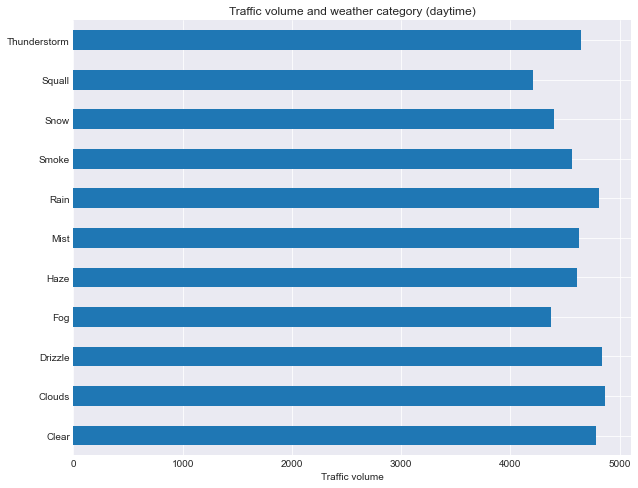

In [18]:
#creating bar plot for `weather_main`
plt.figure(figsize=(10,8))
group_weather_main_day['traffic_volume'].plot(kind='barh')
plt.title('Traffic volume and weather category (daytime)')
plt.xlabel('Traffic volume')
plt.ylabel('')

plt.show()

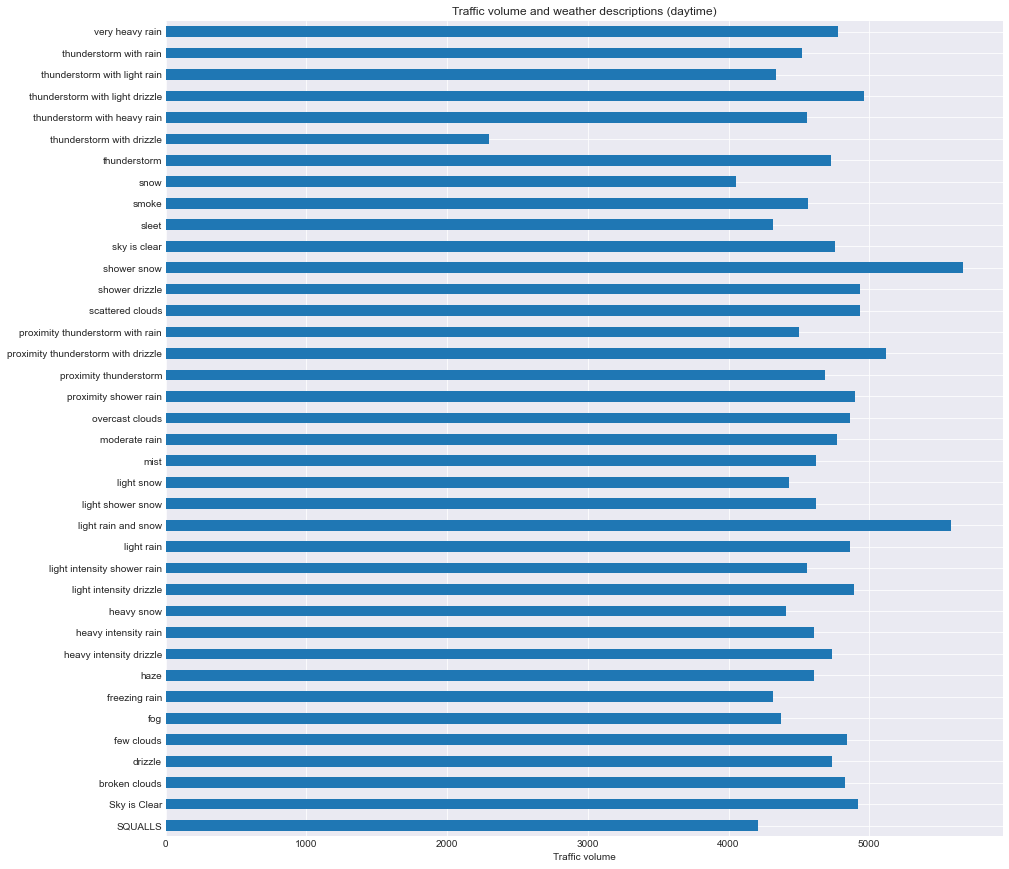

In [19]:
#creating bar plot for `weather_description`
plt.figure(figsize=(15,15))
group_weather_desc_day['traffic_volume'].plot(kind='barh')
plt.title('Traffic volume and weather descriptions (daytime)')
plt.xlabel('Traffic volume')
plt.ylabel('')

plt.show()

The bar plot for `weather_main` shows no strong indicators of a connection between traffic volume and weather. A small reduction in traffic can be seen with 'fog' and 'squall'.

The `weather_description` figure shows an increase in traffic for 'shower snow' and 'light rain and snow'. There is also a very notable drop in traffic for 'thunderstorm with drizzle'.

## 1.4 Exploring nighttime traffic data

Next, let us explore heavy traffic indicators for the nighttime traffic.

### 1.4.1 Exploring the effect of date and time on traffic volume

We will check if the date and time has any predictable effect on the traffic. We will examine months, days, and hours to look for patterns.

In [20]:
#grouping nightime data by month 
traffic_night.loc[:, 'month'] = traffic_night.loc[:,'date_time'].dt.month
group_month_night = traffic_night.groupby('month').mean()
group_month_night['traffic_volume']

month
1     1616.610448
2     1716.961841
3     1817.272029
4     1786.116598
5     1829.852518
6     1932.272727
7     1838.349193
8     1897.564079
9     1818.959858
10    1852.168591
11    1680.311799
12    1622.508393
Name: traffic_volume, dtype: float64

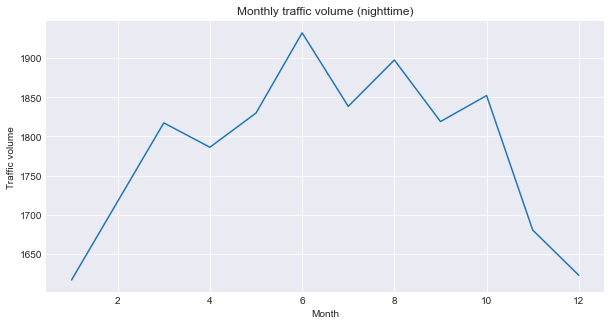

In [21]:
#creating line plot
plt.figure(figsize=(10,5))
group_month_night['traffic_volume'].plot()
plt.title('Monthly traffic volume (nighttime)')
plt.xlabel('Month')
plt.ylabel('Traffic volume')

plt.show()

There is a notable drop in traffic between October-February as in the daytime data plotted earlier. However, there is a small spike in the summer months rather than a large drop.

In [22]:
#grouping nighttime data by day of week
traffic_night.loc[:, 'weekday'] = traffic_night.loc[:, 'date_time'].dt.dayofweek
group_day_nighttime = traffic_night.groupby('weekday').mean()
group_day_nighttime['traffic_volume'] #0 is Monday and 6 is Sunday

weekday
0    1722.532692
1    1862.926571
2    1901.465710
3    1994.177959
4    2059.882336
5    1634.459412
6    1323.998273
Name: traffic_volume, dtype: float64

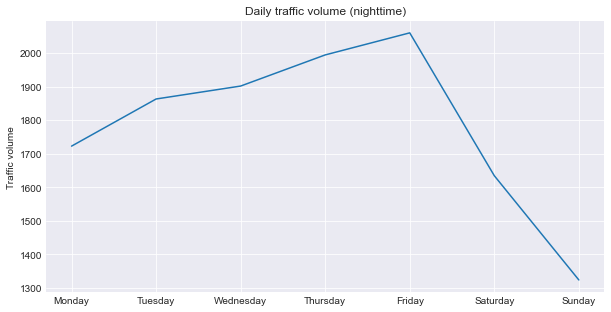

In [23]:
#creating line plot
plt.figure(figsize=(10,5))
group_day_nighttime['traffic_volume'].plot()
plt.title('Daily traffic volume (nighttime)')
plt.xlabel('')
plt.ylabel('Traffic volume')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.show()

This is the same pattern as seen with the daytime data; traffic is fairly consistent across the weekdays and then drops of dramatically during the weekend.

In [24]:
# traffic_day.loc[:, 'hour'] = traffic_day.loc[:, 'date_time'].dt.hour
# workday_day_daytime = traffic_day[traffic_day['weekday'].between(0,4)].copy()
# weekend_day_daytime = traffic_day[traffic_day['weekday'] >= 5].copy()

In [25]:
#grouping by time of day
traffic_night['hour'] = traffic_night['date_time'].dt.hour

# Two df's. One for hours 0-7 and one for 19-23
traffic_night_1 = traffic_night.copy()[traffic_night['date_time'].dt.hour <=6]
traffic_night_2 = traffic_night.copy()[traffic_night['date_time'].dt.hour >=19]

workday_day_nighttime_1 = traffic_night_1.copy()[traffic_night_1['weekday'].between(0,4)]
weekend_day_nighttime_1 = traffic_night_1[traffic_night_1['weekday'] >= 5].copy()
group_hour_workday_night_1 = workday_day_nighttime_1.groupby('hour').mean()
group_hour_weekend_night_1 = weekend_day_nighttime_1.groupby('hour').mean()

#For the hours 19-23
workday_day_nighttime_2 = traffic_night_2.copy()[traffic_night_2['weekday'].between(0,4)]
weekend_day_nighttime_2 = traffic_night_2[traffic_night_2['weekday'] >= 5].copy()
group_hour_workday_night_2 = workday_day_nighttime_2.groupby('hour').mean()
group_hour_weekend_night_2 = weekend_day_nighttime_2.groupby('hour').mean()


print("Hourly traffic (workdays):")
print(group_hour_workday_night_1['traffic_volume'], '\n')
print("Hourly traffic (weekend):")
print(group_hour_weekend_night_1['traffic_volume'], '\n')

print("Hourly traffic (workdays):")
print(group_hour_workday_night_2['traffic_volume'], '\n')
print("Hourly traffic (weekend):")
print(group_hour_weekend_night_2['traffic_volume'])

Hourly traffic (workdays):
hour
0     651.528971
1     396.913043
2     301.982818
3     362.289835
4     832.661096
5    2701.296703
6    5365.983210
Name: traffic_volume, dtype: float64 

Hourly traffic (weekend):
hour
0    1306.414035
1     805.128333
2     611.171986
3     393.611599
4     375.420168
5     639.237232
6    1089.100334
Name: traffic_volume, dtype: float64 

Hourly traffic (workdays):
hour
19    3298.340426
20    2842.433004
21    2673.042807
22    2125.913104
23    1379.549728
Name: traffic_volume, dtype: float64 

Hourly traffic (weekend):
hour
19    3220.234120
20    2815.039216
21    2658.445242
22    2384.368607
23    1699.050699
Name: traffic_volume, dtype: float64


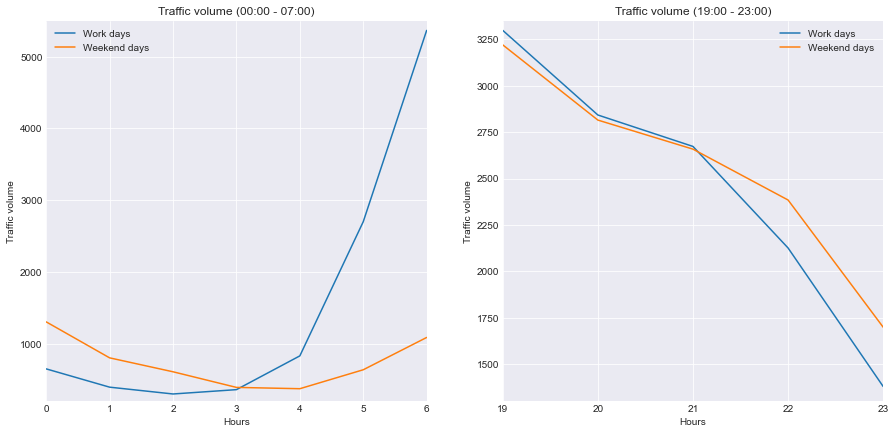

In [26]:
#creating line plot
plt.figure(figsize=(15,7))
plt.subplots_adjust(wspace=0.20)

plt.subplot(1,2,1)
group_hour_workday_night_1['traffic_volume'].plot(label='Work days')
group_hour_weekend_night_1['traffic_volume'].plot(label='Weekend days')
plt.title('Traffic volume (00:00 - 07:00)')
plt.xlabel('Hours')
plt.ylabel('Traffic volume')
plt.legend()
plt.xlim(0, 6)
plt.ylim(200, 5500)


plt.subplot(1,2,2)
group_hour_workday_night_2['traffic_volume'].plot(label='Work days')
group_hour_weekend_night_2['traffic_volume'].plot(label='Weekend days')
plt.title('Traffic volume (19:00 - 23:00)')
plt.xlabel('Hours')
plt.ylabel('Traffic volume')
plt.xticks([19,20,21,22,23])
plt.legend()
plt.xlim(19, 23)
plt.ylim(1300, 3350)

plt.show()

For the hours 00:00 - 07:00 a clear difference can be seen around 05:00. There is a big spike corresponding to morning rush traffic for the work days, but only small increase for the days of the weekend. Traffic during the hours 19:00 - 23:00 is pretty similar for both work days and the weekend.

### 1.4.2 Exploring the effect of weather on traffic volume

In [27]:
traffic_night.corr()['traffic_volume']

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
month             0.001342
weekday          -0.073636
hour              0.454586
Name: traffic_volume, dtype: float64

Temperature has the strongest correlation, followed by the day and time of day. We will make a scatterplot of the temperature correlation.

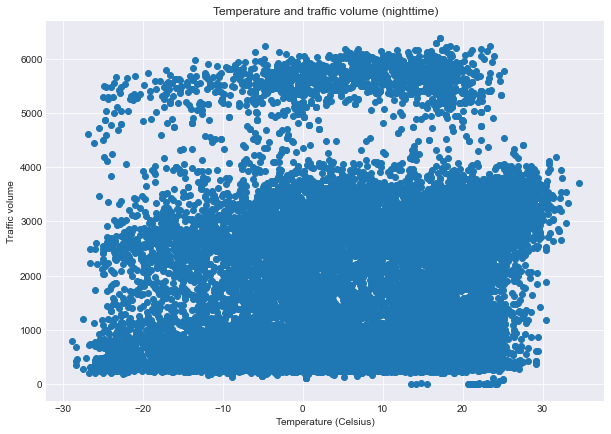

In [28]:
#removing a few outlier '0' values from the `temp` column
traffic_night = traffic_night[traffic_night['temp'] > 0]

#converting from Kelvin to Celsius using the formula: T(°C) = T(K) - 273.15
traffic_night['temp'] = traffic_night['temp'] - 273.15

#scatter plot
plt.figure(figsize=(10,7))
plt.scatter(x=traffic_night['temp'], y=traffic_night['traffic_volume'])
plt.title('Temperature and traffic volume (nighttime)')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Traffic volume')

plt.show()

The scatterplot for nighttime traffic and temperature looks similar to the one for daytime traffic. There is no clear pattern. As with the daytime data we will examine `weather_main` and `weather_description`.

In [29]:
#grouping by the categorical columns
group_weather_main_night = traffic_night.groupby('weather_main').mean()
group_weather_desc_night = traffic_night.groupby('weather_description').mean()

display(group_weather_main_night)
display(group_weather_desc_night)

temp   rain_1h   snow_1h  clouds_all  traffic_volume  \
weather_main                                                              
Clear          6.888700  0.000000  0.000000    1.455426     1762.521534   
Clouds         6.345731  0.000000  0.000000   65.926029     1939.232745   
Drizzle       10.023188  0.145000  0.000000   80.074627     1834.920043   
Fog            7.474182  0.036436  0.000109   42.296364     1605.365455   
Haze           3.460133  0.057700  0.000000   50.220532     1745.640684   
Mist           6.370200  0.229333  0.000652   59.000596     1626.786119   
Rain          13.719183  0.583193  0.000081   69.317909     1814.952314   
Smoke         15.560000  0.000000  0.000000   53.375000     1247.250000   
Snow          -5.224789  0.036681  0.001540   82.450774     1606.324191   
Squall        17.790000  4.303333  0.000000   76.333333     1345.333333   
Thunderstorm  19.064957  1.222333  0.000000   63.356775     1727.842196   

                 month   weekday       hour  
weather_main                                 
Clear         6.493389  3.102762  10.350831  
Clouds        6.274838  2.972764  11.869545  
Drizzle       6.597015  2.797441  10.636461  
Fog           6.727273  3.063636   6.456364  
Haze          5.648289  2.914449   9.946768  
Mist          6.761692  2.912720   8.273756  
Rain          6.815966  2.906747  10.623101  
Smoke         5.500000  3.750000   7.500000  
Snow          6.182138  2.832630  10.015471  
Squall        6.333333  4.333333   8.666667  
Thunderstorm  6.886792  3.053173  10.065180

temp    rain_1h   snow_1h  \
weather_description                                                   
SQUALLS                              17.790000   4.303333  0.000000   
Sky is Clear                         15.322426   0.000000  0.000000   
broken clouds                         6.273389   0.000000  0.000000   
drizzle                               9.432440   0.099062  0.000000   
few clouds                           10.775322   0.000000  0.000000   
fog                                   7.474182   0.036436  0.000109   
haze                                  3.460133   0.057700  0.000000   
heavy intensity drizzle              11.675143   0.082286  0.000000   
heavy intensity rain                 17.261048   2.644395  0.000000   
heavy snow                           -4.103277   0.000000  0.000000   
light intensity drizzle              10.383207   0.182505  0.000000   
light intensity shower rain          19.226667   0.000000  0.000000   
light rain                           13.170099   0.121465  0.000138   
light rain and snow                   0.365000   0.000000  0.000000   
light snow                           -5.903202   0.051529  0.000961   
mist                                  6.370200   0.229333  0.000652   
moderate rain                        13.596884   0.582924  0.000000   
overcast clouds                       2.745058   0.000000  0.000000   
proximity shower rain                18.549200   0.021200  0.000000   
proximity thunderstorm               19.435378   1.159000  0.000000   
proximity thunderstorm with drizzle  14.054286   0.381429  0.000000   
proximity thunderstorm with rain     16.510882   0.392647  0.000000   
scattered clouds                     10.659416   0.000000  0.000000   
shower drizzle                        0.956667   0.000000  0.000000   
sky is clear                          5.799110   0.000000  0.000000   
smoke                                15.560000   0.000000  0.000000   
snow                                 -3.214808   0.014615  0.008077   
thunderstorm                         19.847922   1.382857  0.000000   
thunderstorm with heavy rain         18.226053   2.726842  0.000000   
thunderstorm with light drizzle      16.165556   1.601111  0.000000   
thunderstorm with light rain         18.892581   0.309032  0.000000   
thunderstorm with rain               18.352353   1.981176  0.000000   
very heavy rain                      14.270909  25.459091  0.000000   

                                     clouds_all  traffic_volume     month  \
weather_description                                                         
SQUALLS                               76.333333     1345.333333  6.333333   
Sky is Clear                           0.000000     1964.941648  7.596110   
broken clouds                         71.767218     1926.904965  6.631073   
drizzle                               84.302949     1870.710456  6.410188   
few clouds                            19.207872     2076.963100  6.306273   
fog                                   42.296364     1605.365455  6.727273   
haze                                  50.220532     1745.640684  5.648289   
heavy intensity drizzle               86.285714     2238.057143  6.857143   
heavy intensity rain                  76.306452     1841.717742  7.221774   
heavy snow                            87.182432     1539.354730  5.790541   
light intensity drizzle               76.612903     1780.948767  6.713472   
light intensity shower rain           73.333333     2747.666667  7.000000   
light rain                            64.953153     1800.763363  6.755556   
light rain and snow                   82.500000      724.000000  1.000000   
light snow                            80.254132     1640.341942  6.334711   
mist                                  59.000596     1626.786119  6.761692   
moderate rain                         75.629124     1803.143345  6.820250   
overcast clouds                       90.181090     1837.845753  5.929487   
proximity shower

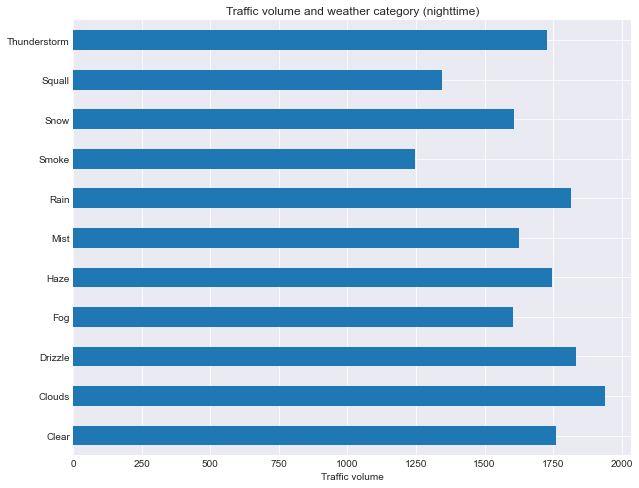

In [30]:
#creating bar plot for `weather_main`
plt.figure(figsize=(10,8))
group_weather_main_night['traffic_volume'].plot(kind='barh')
plt.title('Traffic volume and weather category (nighttime)')
plt.xlabel('Traffic volume')
plt.ylabel('')

plt.show()

Similar to the daytime data. No strong indicators of heavy traffic.

In [31]:
#creating bar plot for `weather_description`
plt.figure(figsize=(15,10))
group_weather_desc_nigh['traffic_volume'].plot(kind='barh')
plt.title('Traffic volume and weather descriptions (nighttime)')
plt.xlabel('Traffic volume')
plt.ylabel('')

plt.show()

NameError: name 'group_weather_desc_nigh' is not defined

<Figure size 1080x720 with 0 Axes>

There are some strong indicators here. Light rain and snow is correlated with a dramatic drop in traffic volume.  
Proximity shower rain and light intensity shower rain is correlated with the highest traffic volume. It is hard to say why this is.

# 3.0 Conclusion

We have managed to find some indicators of heavy traffic:

- Daytime
  - Traffic volume is greater in the months March-October compared to November-February
  - Traffic is heavier on work days than on the weekends
  - Traffic is heavier during the 07:00 and 16:00 rush hours
  - 'Shower snow' and 'light rain and snow' are correlated with higher traffic volume  
<br />
- Nighttime
  - Traffic volume is greater in the months March-October compared to November-February
  - Traffic is heavier on work days than on the weekends
  - Traffic is heavier from 00:00 - 07:00 on weekends compared to week days
  - 'Proximity shower rain' and 'light intensity shower rain' are correlated with greater traffic volume during nighttime


